In [1]:
#Import packages and get the data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
#import pandas_datareader.data as pdr
import yfinance as yf

# For time stamps
from datetime import datetime

C:\Users\adity\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\adity\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\adity\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# The tech stocks we'll use for this analysis are AAPL, AMZN, GOOG in the time period 2010-01-01 till today
tech_list = ['AAPL', 'GOOG', 'AMZN']

start = "2010-01-01"
end = datetime.now()
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
company_list = [AAPL, GOOG, AMZN]
company_name = ["APPLE", "GOOGLE", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600,APPLE
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800,APPLE
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000,APPLE
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200,APPLE
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800,APPLE
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.396485,462229600,APPLE
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.323724,594459600,APPLE
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.412921,605892000,APPLE
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.375780,432894000,APPLE


In [5]:
df = AAPL.copy()

[array([4.47776362e-03, 4.55321042e-03, 3.85789270e-03, 3.77836496e-03,
       4.06383392e-03, 3.68253530e-03, 3.19519517e-03, 3.79263868e-03,
       3.54387631e-03, 2.83020666e-03, 4.68778577e-03, 4.01286179e-03,
       3.26656105e-03, 1.16225866e-03, 2.24703686e-03, 2.83224576e-03,
       3.22782354e-03, 1.47627233e-03, 2.03638039e-06, 5.46463221e-04,
       7.76876395e-04, 1.46403771e-03, 0.00000000e+00, 6.95312283e-04,
       4.22080672e-04, 8.44166789e-04, 6.25985509e-04, 1.34985068e-03,
       1.69853181e-03, 2.31432725e-03, 2.14100896e-03, 2.21848942e-03,
       1.96156791e-03, 1.70668550e-03, 1.02156329e-03, 1.75562669e-03,
       2.02885830e-03, 2.56308963e-03, 3.45416123e-03, 3.42561379e-03,
       3.52348256e-03, 3.80487330e-03, 5.48505863e-03, 5.51156697e-03,
       6.31495443e-03, 6.68606025e-03, 6.82063559e-03, 7.04493690e-03,
       6.48215813e-03, 6.60653796e-03, 6.53925029e-03, 6.64732002e-03,
       6.15794623e-03, 6.66771105e-03, 7.40380811e-03, 7.60975477e-03,
     

C:\Users\adity\AppData\Local\Temp\ipykernel_41432\1667608590.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


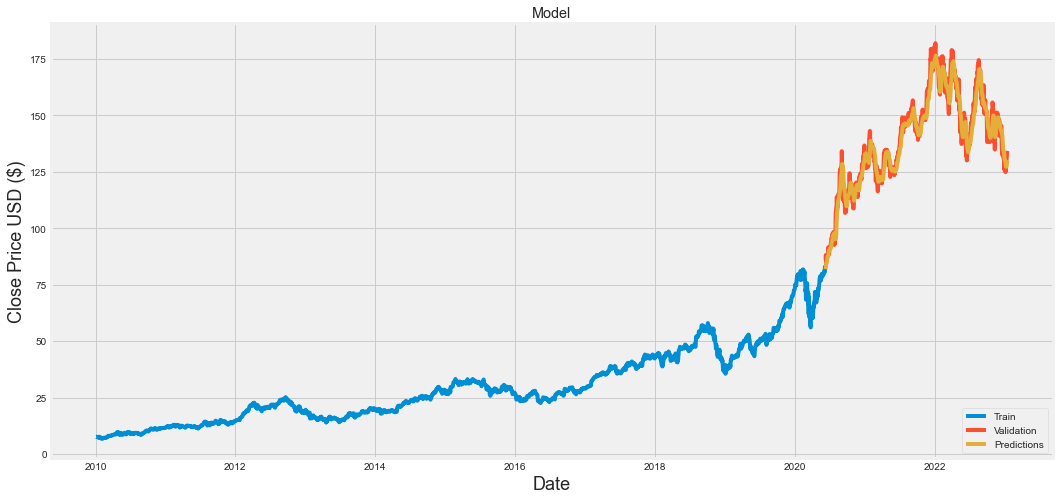

In [9]:
import math
#import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.8 )

training_data_len

#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

#Create the training data set 
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
#We create a loop
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) #Will conaint 60 values (0-59)
  y_train.append(train_data[i, 0]) #Will contain the 61th value (60)
  if i <= 60:
    print(x_train)
    print(y_train)
    print()


#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

#Create the testing data set
#Create a new array containing scaled values from index 1738 to 2247
test_data = scaled_data[training_data_len - 60:]
#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Get the model's predicted price values for the x_test data set
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

#Evaluate model (get the root mean quared error (RMSE))
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [20]:
test_data

array([[0.35759743],
       [0.30655579],
       [0.32175694],
       [0.31292171],
       [0.31022404],
       [0.28804319],
       [0.28109204],
       [0.31322146],
       [0.31128028],
       [0.3297215 ],
       [0.31444897],
       [0.32454025],
       [0.32379803],
       [0.30470024],
       [0.31043813],
       [0.30541391],
       [0.33547367],
       [0.33113455],
       [0.3406121 ],
       [0.34335257],
       [0.35086039],
       [0.37055765],
       [0.36681803],
       [0.37004383],
       [0.36449146],
       [0.35611299],
       [0.34389497],
       [0.35492831],
       [0.35340105],
       [0.36473413],
       [0.36501961],
       [0.35846809],
       [0.37152828],
       [0.38019219],
       [0.37344091],
       [0.37927872],
       [0.385559  ],
       [0.38994095],
       [0.39437995],
       [0.40350067],
       [0.41046609],
       [0.40532766],
       [0.39996085],
       [0.40265854],
       [0.40004649],
       [0.4103947 ],
       [0.40779697],
       [0.416

In [11]:
X_FUTURE = 100
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
  curr_prediction = model.predict(np.array([last]))
  print(curr_prediction)
  last = np.concatenate([last[1:], curr_prediction])
  predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = scaler.inverse_transform([predictions])[0]
print(predictions)

[[0.7033562]]
[[0.7060734]]
[[0.7074636]]
[[0.70819]]
[[0.70857465]]
[[0.7087769]]
[[0.7088773]]
[[0.70891744]]
[[0.70892]]
[[0.7088978]]
[[0.7088589]]
[[0.7088082]]
[[0.708749]]
[[0.70868355]]
[[0.7086139]]
[[0.70854086]]
[[0.70846564]]
[[0.708389]]
[[0.70831114]]
[[0.7082328]]
[[0.7081542]]
[[0.7080756]]
[[0.7079969]]
[[0.70791864]]
[[0.7078407]]
[[0.707763]]
[[0.707686]]
[[0.7076093]]
[[0.70753324]]
[[0.7074578]]
[[0.70738286]]
[[0.70730853]]
[[0.70723474]]
[[0.7071617]]
[[0.7070891]]
[[0.7070173]]
[[0.70694596]]
[[0.70687515]]
[[0.7068049]]
[[0.7067353]]
[[0.70666635]]
[[0.7065978]]
[[0.70652986]]
[[0.70646256]]
[[0.7063957]]
[[0.70632935]]
[[0.7062638]]
[[0.7061985]]
[[0.7061338]]
[[0.7060697]]
[[0.70600617]]
[[0.705943]]
[[0.7058804]]
[[0.7058184]]
[[0.7057568]]
[[0.7056958]]
[[0.7056352]]
[[0.70557517]]
[[0.7055155]]
[[0.7054563]]
[[0.7053976]]
[[0.70533955]]
[[0.70528173]]
[[0.70522445]]
[[0.7051676]]
[[0.7051113]]
[[0.7050554]]
[[0.70499986]]
[[0.70494485]]
[[0.70489025]]
[[0.

In [12]:
import datetime
from datetime import timedelta
dicts = []
curr_date = data.index[-1]
for i in range(X_FUTURE):
  curr_date = curr_date + timedelta(days=1)
  dicts.append({'Predictions':predictions[i], "Date": curr_date})

new_data = pd.DataFrame(dicts).set_index("Date")

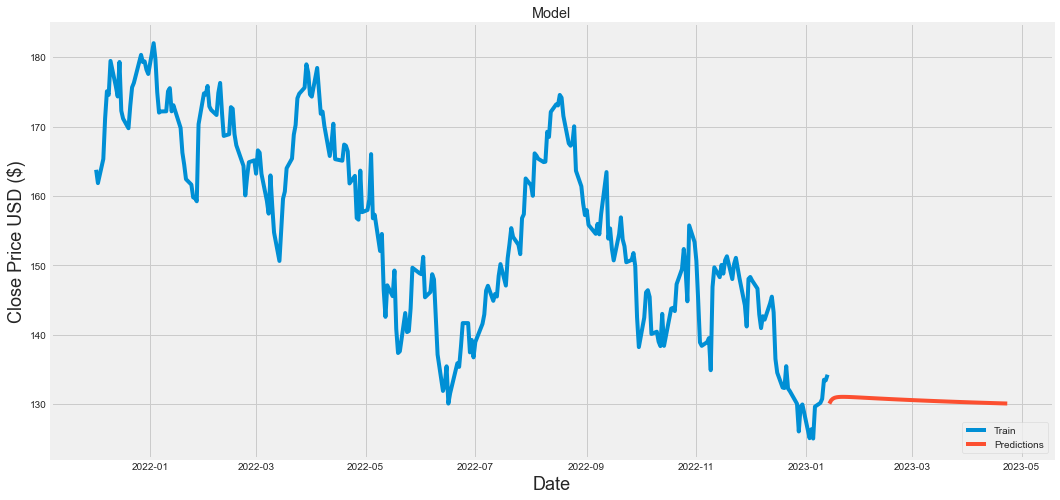

In [26]:
#Plot the data
train = data
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'][3000:])
plt.plot(new_data['Predictions'])
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.show()

In [14]:
new_data.head()

,Predictions
Date,
2023-01-14,130.052518
2023-01-15,130.528438
2023-01-16,130.771936
2023-01-17,130.899166
2023-01-18,130.966534


In [19]:
x_test

array([[[0.35759743],
        [0.30655579],
        [0.32175694],
        ...,
        [0.42089994],
        [0.4340029 ],
        [0.43680048]],

       [[0.30655579],
        [0.32175694],
        [0.31292171],
        ...,
        [0.4340029 ],
        [0.43680048],
        [0.45183036]],

       [[0.32175694],
        [0.31292171],
        [0.31022404],
        ...,
        [0.43680048],
        [0.45183036],
        [0.46446232]],

       ...,

       [[0.7509008 ],
        [0.77390951],
        [0.78156002],
        ...,
        [0.70088678],
        [0.70391273],
        [0.70722417]],

       [[0.77390951],
        [0.78156002],
        [0.78218806],
        ...,
        [0.70391273],
        [0.70722417],
        [0.72298205]],

       [[0.78156002],
        [0.78218806],
        [0.77950465],
        ...,
        [0.70722417],
        [0.72298205],
        [0.72252529]]])